In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
data_final=pd.read_csv('cleaned_data.csv')
data_final=data_final.drop('Unnamed: 0',axis=1)
data_final=data_final.sample(frac=.2)

In [3]:
X=data_final.drop('Accepted',axis=1)
y=data_final['Accepted']

In [4]:
def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

categorical_indicies = get_categorical_indicies(X)

In [5]:
def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')

convert_cats(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [7]:
train_df = pd.concat([X,y],axis=1)
accepted = train_df[train_df['Accepted']==1]
rejected = train_df[train_df['Accepted']==0]
rejected = rejected.sample(n=len(accepted), random_state=101)
train_df = pd.concat([accepted,rejected],axis=0)
X_train = train_df.drop('Accepted',axis=1)
y_train = train_df['Accepted']

In [8]:
train_dataset = cb.Pool(X_train,y_train, cat_features=categorical_indicies)
test_dataset = cb.Pool(X_test,y_test, cat_features=categorical_indicies)

In [9]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')

In [10]:
grid = {'learning_rate': [0.03],
'depth': [4],
'l2_leaf_reg': [1],
'iterations': [50]}

In [11]:
model.grid_search(grid,train_dataset)

0:	learn: 0.9238401	test: 0.9225875	best: 0.9225875 (0)	total: 189ms	remaining: 9.29s
1:	learn: 0.9237564	test: 0.9226433	best: 0.9226433 (1)	total: 216ms	remaining: 5.19s
2:	learn: 0.9257797	test: 0.9261595	best: 0.9261595 (2)	total: 243ms	remaining: 3.8s
3:	learn: 0.9259053	test: 0.9261037	best: 0.9261595 (2)	total: 273ms	remaining: 3.13s
4:	learn: 0.9256820	test: 0.9258246	best: 0.9261595 (2)	total: 298ms	remaining: 2.68s
5:	learn: 0.9256820	test: 0.9258246	best: 0.9261595 (2)	total: 326ms	remaining: 2.39s
6:	learn: 0.9256680	test: 0.9257688	best: 0.9261595 (2)	total: 355ms	remaining: 2.18s
7:	learn: 0.9256680	test: 0.9257688	best: 0.9261595 (2)	total: 381ms	remaining: 2s
8:	learn: 0.9256680	test: 0.9257688	best: 0.9261595 (2)	total: 411ms	remaining: 1.87s
9:	learn: 0.9254448	test: 0.9257688	best: 0.9261595 (2)	total: 436ms	remaining: 1.74s
10:	learn: 0.9254448	test: 0.9257688	best: 0.9261595 (2)	total: 464ms	remaining: 1.64s
11:	learn: 0.9253750	test: 0.9258804	best: 0.9261595 (2)	

43:	learn: 0.9480743	test: 0.9498694	best: 0.9498694 (43)	total: 1.12s	remaining: 153ms
44:	learn: 0.9481246	test: 0.9499699	best: 0.9499699 (44)	total: 1.15s	remaining: 128ms
45:	learn: 0.9483925	test: 0.9501708	best: 0.9501708 (45)	total: 1.18s	remaining: 102ms
46:	learn: 0.9484260	test: 0.9502378	best: 0.9502378 (46)	total: 1.2s	remaining: 76.7ms
47:	learn: 0.9488111	test: 0.9506396	best: 0.9506396 (47)	total: 1.23s	remaining: 51.1ms
48:	learn: 0.9487944	test: 0.9505726	best: 0.9506396 (47)	total: 1.25s	remaining: 25.5ms
49:	learn: 0.9487944	test: 0.9506061	best: 0.9506396 (47)	total: 1.27s	remaining: 0us

bestTest = 0.9506396089
bestIteration = 47

Training on fold [1/3]
0:	learn: 0.9253709	test: 0.9257870	best: 0.9257870 (0)	total: 27.9ms	remaining: 1.37s
1:	learn: 0.9254044	test: 0.9256865	best: 0.9257870 (0)	total: 52.7ms	remaining: 1.26s
2:	learn: 0.9253709	test: 0.9256196	best: 0.9257870 (0)	total: 80.9ms	remaining: 1.27s
3:	learn: 0.9255551	test: 0.9255861	best: 0.9257870 (0)

44:	learn: 0.9480426	test: 0.9474883	best: 0.9474883 (44)	total: 1.15s	remaining: 128ms
45:	learn: 0.9487291	test: 0.9477227	best: 0.9477227 (45)	total: 1.18s	remaining: 103ms
46:	learn: 0.9486621	test: 0.9478232	best: 0.9478232 (46)	total: 1.21s	remaining: 77ms
47:	learn: 0.9489635	test: 0.9480241	best: 0.9480241 (47)	total: 1.23s	remaining: 51.2ms
48:	learn: 0.9491310	test: 0.9484260	best: 0.9484260 (48)	total: 1.26s	remaining: 25.6ms
49:	learn: 0.9492147	test: 0.9483925	best: 0.9484260 (48)	total: 1.3s	remaining: 0us

bestTest = 0.9484259879
bestIteration = 48



{'params': {'depth': 4,
  'l2_leaf_reg': 1,
  'iterations': 50,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [12]:
model.get_params()

{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 4,
 'l2_leaf_reg': 1,
 'iterations': 50,
 'learning_rate': 0.03}

In [13]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     36241
           1       0.77      0.92      0.84      8958

    accuracy                           0.93     45199
   macro avg       0.87      0.93      0.90     45199
weighted avg       0.94      0.93      0.93     45199



In [14]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

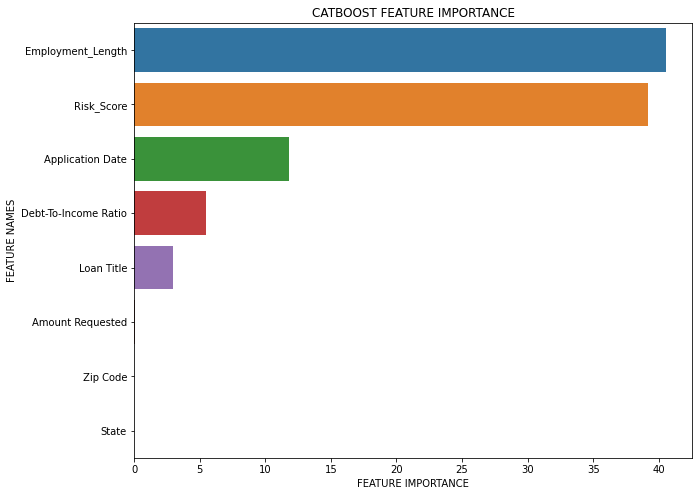

In [15]:
plot_feature_importance(model.get_feature_importance(),X.columns,'CATBOOST')

In [16]:
model.calc_feature_statistics(test_dataset,feature='Employment_Length',plot=True,prediction_type='Class')

{'borders': array([0.5, 1.5, 5.5], dtype=float32),
 'binarized_feature': array([3, 0, 0, ..., 0, 0, 0]),
 'mean_target': array([0.03908918, 0.6521253 , 0.60222274, 0.77386147], dtype=float32),
 'mean_weighted_target': array([], dtype=float32),
 'mean_prediction': array([0.03214129, 0.8187919 , 0.8256541 , 0.9260164 ], dtype=float32),
 'objects_per_bin': array([34255,   894,  4319,  5731], dtype=uint32),
 'predictions_on_varying_feature': array([0.10471471, 0.47485564, 0.47485564, 0.47485564])}

In [17]:
def plot_lift_curve(y_val, y_pred, step=0.01):
    aux_lift = pd.DataFrame()
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    x_val = np.arange(step,1+step,step)
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    y_v = []
    
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

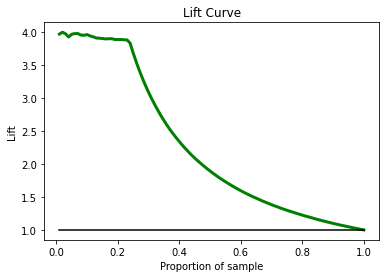

In [18]:
plot_lift_curve(y_test,pred,step=0.01)

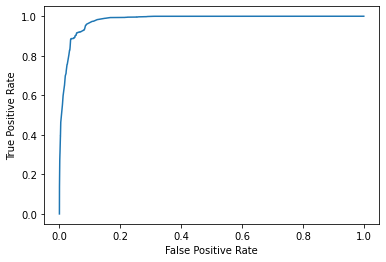

In [19]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
data_final.groupby('Application Date')['Accepted'].describe()

,count,mean,std,min,25%,50%,75%,max
Application Date,,,,,,,,
2007Q2,7.0,0.142857,0.377964,0.0,0.0,0.0,0.0,1.0
2007Q3,21.0,0.190476,0.402374,0.0,0.0,0.0,0.0,1.0
2007Q4,105.0,0.104762,0.307715,0.0,0.0,0.0,0.0,1.0
2008Q1,162.0,0.191358,0.394590,0.0,0.0,0.0,0.0,1.0
2008Q2,115.0,0.069565,0.255526,0.0,0.0,0.0,0.0,1.0
2008Q3,56.0,0.142857,0.353094,0.0,0.0,0.0,0.0,1.0
2008Q4,176.0,0.073864,0.262295,0.0,0.0,0.0,0.0,1.0
2009Q1,187.0,0.096257,0.295735,0.0,0.0,0.0,0.0,1.0
2009Q2,333.0,0.096096,0.295167,0.0,0.0,0.0,0.0,1.0


In [21]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning:

Overriding the parameters from Reference Dataset.

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning:

categorical_column in param dict is overridden.



[20]	training's binary_logloss: 0.173509	valid_0's binary_logloss: 0.185151
[40]	training's binary_logloss: 0.0977302	valid_0's binary_logloss: 0.114742
[60]	training's binary_logloss: 0.069485	valid_0's binary_logloss: 0.0939959
[80]	training's binary_logloss: 0.0576725	valid_0's binary_logloss: 0.0894364
[100]	training's binary_logloss: 0.0482423	valid_0's binary_logloss: 0.0855017


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [22]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9845
Testing accuracy 0.9675


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

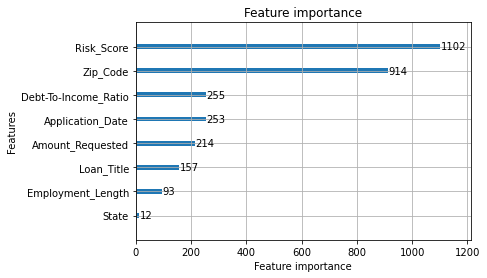

In [23]:
lgb.plot_importance(model)

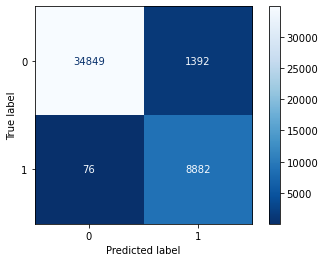

In [24]:
#metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')